In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display_markdown
from scipy.stats import linregress
import random
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Source
# https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete

In [4]:
#Bank Churners
bank_churners = pd.read_csv("BankChurners.csv")
bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
# Drop unneccesary columns
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]

In [6]:
#Dropping of Unneccesary column
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# Checking for incomplete rows
bank_churners.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [8]:
# Statistical Summary of Entire Cleaned Dataset
bank_churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# Making a new data frame of only churners
churners = bank_churners.loc[bank_churners["Attrition_Flag"]=="Attrited Customer"]
churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [10]:
#Statistical Summary of Churners DataFrame
churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [11]:
# Summary Statistics for Existing Customers
content_customers = bank_churners.loc[bank_churners["Attrition_Flag"]=="Existing Customer"]
content_customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164


In [12]:
content_customers.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [13]:
#New DataFrame to exclude customers with an average utilization ratio in order to eliminate customers who don't use the card
bank_churners_nonzero = bank_churners.loc[bank_churners['Avg_Utilization_Ratio']>0]
churners_nonzero = churners.loc[churners['Avg_Utilization_Ratio']>0]
content_customers_nonzero = content_customers.loc[content_customers['Avg_Utilization_Ratio']>0]
bank_churners_nonzero

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511


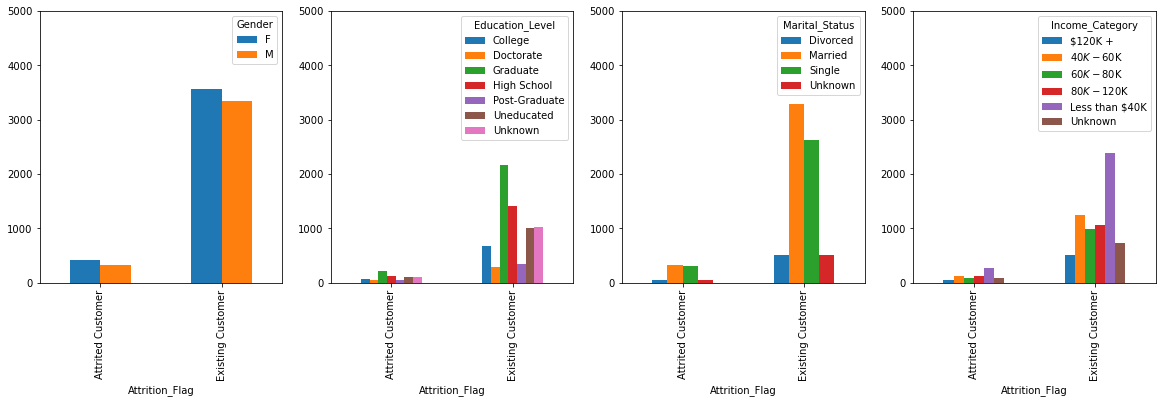

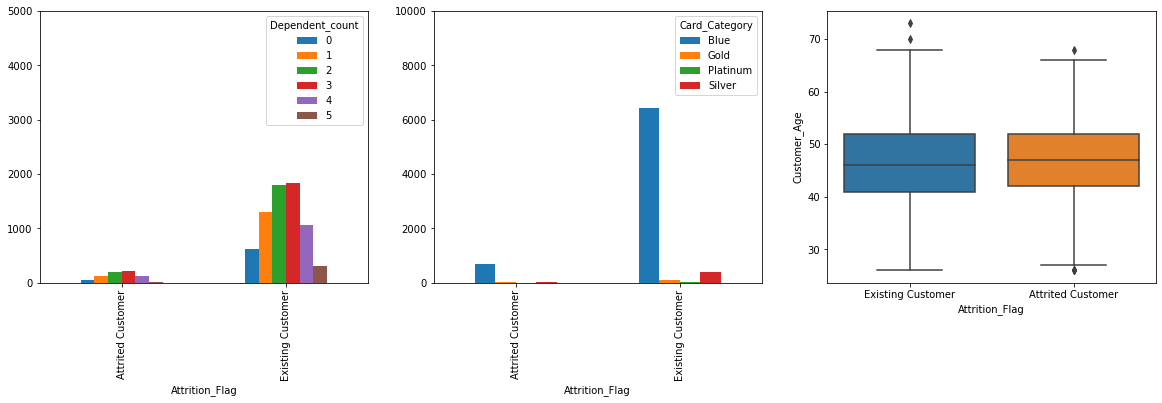

In [14]:
df_demographic=pd.concat([bank_churners_nonzero['Customer_Age'],bank_churners_nonzero['Gender'], bank_churners_nonzero['Education_Level'],bank_churners_nonzero['Marital_Status'],bank_churners_nonzero['Income_Category'],bank_churners_nonzero['Attrition_Flag']],axis=1)

fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(bank_churners_nonzero['Attrition_Flag'],bank_churners_nonzero['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(bank_churners_nonzero['Attrition_Flag'],bank_churners_nonzero['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(bank_churners_nonzero['Attrition_Flag'],bank_churners_nonzero['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(bank_churners_nonzero['Attrition_Flag'],bank_churners_nonzero['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])
plt.savefig("Output/categorical_data.png")

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(bank_churners_nonzero['Attrition_Flag'],bank_churners_nonzero['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(bank_churners_nonzero['Attrition_Flag'],bank_churners_nonzero['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)
plt.savefig("Output/categorical_plots.png")

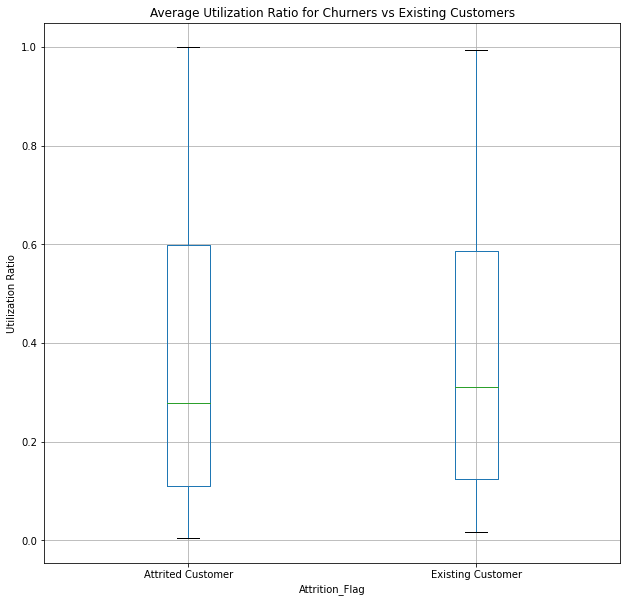

In [15]:
# Boxplot to show Average Utilization Ratio for Churners vs. Non Churners
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Avg_Utilization_Ratio", figsize=(10,10))
plt.title("Average Utilization Ratio for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Utilization Ratio")
plt.savefig("Output/utilization_ratio_boxplot.png")
plt.show()


In [16]:
customer_types = bank_churners["Attrition_Flag"].unique()
churner_aur = churners_nonzero["Avg_Utilization_Ratio"]
content_aur = content_customers_nonzero["Avg_Utilization_Ratio"]

utilization_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Mean Average Utilization Ratio":[content_aur.mean(), churner_aur.mean()],
                              "Median Average Utilization Ratio": [content_aur.median(), churner_aur.median()],
                              "Standard Deviation of Average Utilization Ratio": [content_aur.std(), churner_aur.std()]
                              })

utilization_df["Mean Average Utilization Ratio"] = utilization_df ["Mean Average Utilization Ratio"].map("{:.2f}".format)

utilization_df

,Customer Type,Mean Average Utilization Ratio,Median Average Utilization Ratio,Standard Deviation of Average Utilization Ratio
0,Existing Customer,0.36,0.311,0.258153
1,Attrited Customer,0.36,0.278,0.289576


In [17]:
attrited_aur = churners_nonzero["Avg_Utilization_Ratio"]
existing_aur = content_customers_nonzero["Avg_Utilization_Ratio"]

st.ttest_ind(attrited_aur, existing_aur, equal_var=False)

Ttest_indResult(statistic=-0.34017615944619783, pvalue=0.733806835966264)

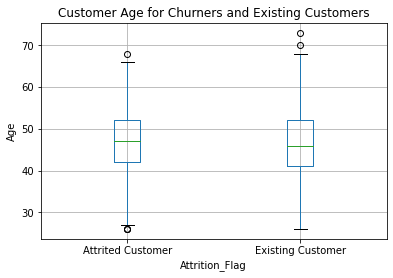

In [18]:
#Box Plot of Churners by Age
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
#fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
#ax1.boxplot(times)
#plt.show()

bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Customer_Age")
plt.title("Customer Age for Churners and Existing Customers")
plt.suptitle("")
plt.ylabel("Age")
plt.savefig("Output/age_boxplot.png")



In [19]:
attrited_ag = churners_nonzero["Customer_Age"]
existing_ag = content_customers_nonzero["Customer_Age"]

st.ttest_ind(attrited_ag, existing_ag, equal_var=False)

Ttest_indResult(statistic=1.6192853376587077, pvalue=0.10572874802582928)

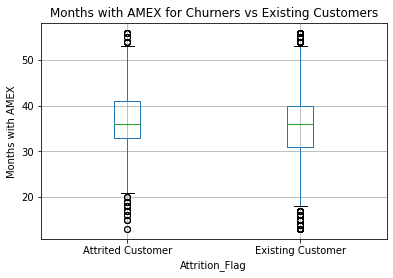

In [20]:
#Looking at Churners by How Long they had their cards 
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Months_on_book")
plt.title("Months with AMEX for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Months with AMEX")
plt.savefig("Output/months_with_AMEX_boxplot.png")
plt.show()


In [21]:
attrited_mob = churners_nonzero["Months_on_book"]
existing_mob = content_customers_nonzero["Months_on_book"]

st.ttest_ind(attrited_mob, existing_mob, equal_var=False)

Ttest_indResult(statistic=1.5957001378505917, pvalue=0.110905551045332)

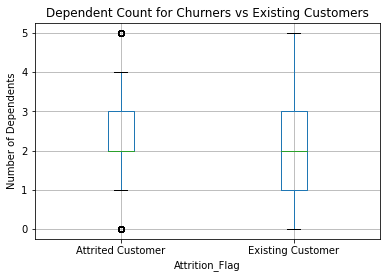

In [22]:
bank_churners.boxplot(by="Attrition_Flag", column = "Dependent_count")
plt.title("Dependent Count for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Number of Dependents")
plt.savefig("Output/dependents.png")
plt.show()



In [23]:
attrited_dc = churners_nonzero["Dependent_count"]
existing_dc = content_customers_nonzero["Dependent_count"]
st.ttest_ind(attrited_dc, existing_dc, equal_var=False)

Ttest_indResult(statistic=1.1215169742005662, pvalue=0.2623611558253344)

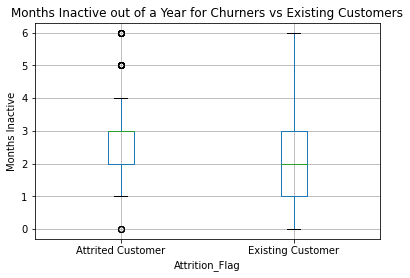

In [24]:
#By Months Inactive
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Months_Inactive_12_mon")
plt.title("Months Inactive out of a Year for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Months Inactive")
plt.savefig("Output/months_inactive.png")
plt.show()

In [25]:
churners_ma = churners_nonzero["Months_Inactive_12_mon"]
content_customers_ma = content_customers["Months_Inactive_12_mon"]

st.ttest_ind(churners_ma, content_customers_ma, equal_var=False)

Ttest_indResult(statistic=12.946185443004437, pvalue=2.771878550439388e-35)

In [26]:
customer_types = bank_churners_nonzero["Attrition_Flag"].unique()


ma_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                          "Mean Month's Inactive":[content_customers_ma.mean(), churners_ma.mean()],
                          "Median Month's Inactive":[content_customers_ma.median(), churners_ma.median()],
                          "Standard Deviation for Total Transaction Amount": [content_customers_ma.std(), churners_ma.std()]
                         })

ma_df["Mean Month's Inactive"] = ma_df ["Mean Month's Inactive"].map("{:.2f}".format)
ma_df["Median Month's Inactive"] = ma_df ["Median Month's Inactive"].map("{:.2f}".format)
ma_df["Standard Deviation for Total Transaction Amount"] = ma_df ["Standard Deviation for Total Transaction Amount"].map("{:.2f}".format)

ma_df

,Customer Type,Mean Month's Inactive,Median Month's Inactive,Standard Deviation for Total Transaction Amount
0,Existing Customer,2.27,2.00,1.02
1,Attrited Customer,2.73,3.00,0.90


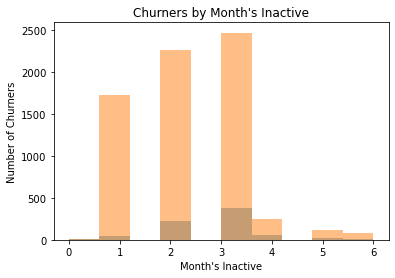

In [27]:
#histogram of customer by months inactive
plt.hist(churners_nonzero.Months_Inactive_12_mon, alpha=0.5)
plt.hist(content_customers_nonzero.Months_Inactive_12_mon, alpha=0.5)
plt.title("Churners by Month's Inactive")
plt.xlabel("Month's Inactive")
plt.ylabel("Number of Churners")
plt.savefig("Output/Months_Inactive_Histogram.png")
plt.show()

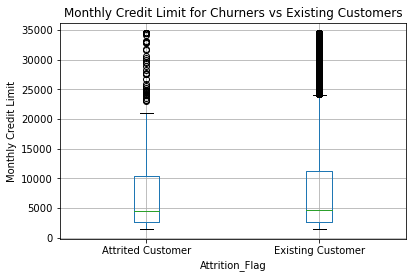

In [28]:
#Looking at Credit Limit for Churners via Existing Customers
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Credit_Limit")
plt.title("Monthly Credit Limit for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Monthly Credit Limit")
plt.savefig("Output/credit_limit.png")
plt.show()


In [29]:
churner_mcl = churners_nonzero["Credit_Limit"]
content_mcl = content_customers_nonzero["Credit_Limit"]
st.ttest_ind(churner_mcl, content_mcl, equal_var=False)         

Ttest_indResult(statistic=-0.35082732766498637, pvalue=0.725801533071163)

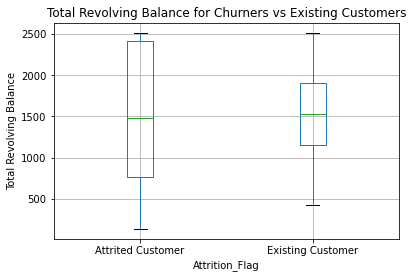

In [30]:
#Looking at Total Revolving Balance for Churners via Existing Customers
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Total_Revolving_Bal")
plt.title("Total Revolving Balance for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Total Revolving Balance")
plt.savefig("Output/balance.png")
plt.show()



In [31]:
customer_types = bank_churners_nonzero["Attrition_Flag"].unique()
churner_trb = churners_nonzero["Total_Revolving_Bal"]
content_trb = content_customers_nonzero["Total_Revolving_Bal"]

balance_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                           "Average Total Revolving Balance":[content_trb.mean(), churner_trb.mean()],
                           "Median Total Revolving Balance": [content_trb.median(), churner_trb.median()],
                           "Standard Deviation for Total Revolving Balance": [content_trb.std(), churner_trb.std()],
                           
                          })

balance_df["Average Total Revolving Balance"] = balance_df ["Average Total Revolving Balance"].map("{:.2f}".format)
balance_df["Standard Deviation for Total Revolving Balance"] = balance_df["Standard Deviation for Total Revolving Balance"].map("{:.2f}".format)

balance_df

,Customer Type,Average Total Revolving Balance,Median Total Revolving Balance,Standard Deviation for Total Revolving Balance
0,Existing Customer,1542.85,1525.0,513.12
1,Attrited Customer,1491.39,1477.0,812.86


In [32]:
st.ttest_ind(churner_trb, content_trb, equal_var=False)

Ttest_indResult(statistic=-1.6798387858017831, pvalue=0.09338102951653898)

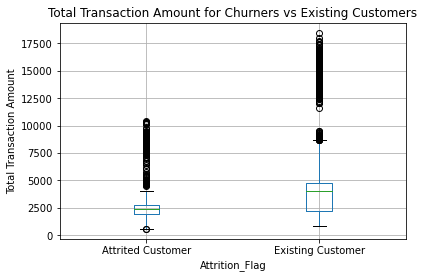

In [33]:
#Looking at Customers by Total Transaction Amount
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Total_Trans_Amt")
plt.title("Total Transaction Amount for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Total Transaction Amount")
plt.savefig("Output/Total_Amount.png")
plt.show()


In [34]:
### customer_types = bank_churners_nonzero["Attrition_Flag"].unique()
churner_tta = churners_nonzero["Total_Trans_Amt"]
content_tta = content_customers_nonzero["Total_Trans_Amt"]

amount_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                          "Average Total Transaction Amount":[content_tta.mean(), churner_tta.mean()],
                          "Median Total Transaction Amount":[content_tta.median(), churner_tta.median()],
                          "Standard Deviation for Total Transaction Amount": [content_tta.std(), churner_tta.std()]
                         })

amount_df["Average Total Transaction Amount"] = amount_df ["Average Total Transaction Amount"].map("{:.2f}".format)
amount_df["Median Total Transaction Amount"] = amount_df ["Median Total Transaction Amount"].map("{:.2f}".format)
amount_df["Standard Deviation for Total Transaction Amount"] = amount_df ["Standard Deviation for Total Transaction Amount"].map("{:.2f}".format)

amount_df

,Customer Type,Average Total Transaction Amount,Median Total Transaction Amount,Standard Deviation for Total Transaction Amount
0,Existing Customer,4681.27,4081.00,3611.78
1,Attrited Customer,3148.97,2361.00,2357.93


In [35]:
st.ttest_ind(churner_tta, content_tta, equal_var=False)

Ttest_indResult(statistic=-15.755189537155141, pvalue=9.92015474310627e-51)

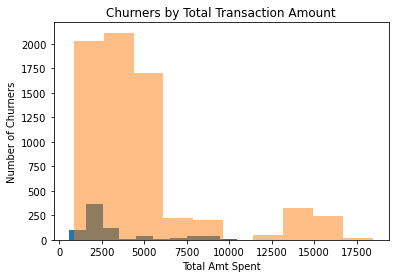

In [36]:
#histogram of attrited customers by transaction amount
plt.hist(churners_nonzero.Total_Trans_Amt)
plt.hist(content_customers_nonzero.Total_Trans_Amt, alpha=0.5)
plt.title("Churners by Total Transaction Amount")
plt.xlabel("Total Amt Spent")
plt.ylabel("Number of Churners")
plt.savefig("Output/Total_amount_histogram.png")
plt.show()

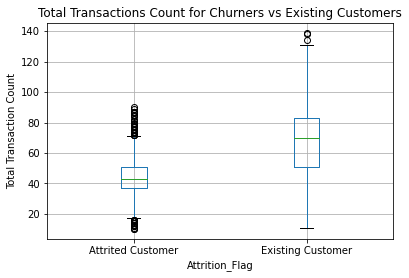

In [37]:
#Looking at Customers by Total Transaction Count
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Total_Trans_Ct")
plt.title("Total Transactions Count for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Total Transaction Count")
plt.savefig("Output/Total_Transaction_Count_boxplot.png")
plt.show()


In [38]:
customer_types = bank_churners["Attrition_Flag"].unique()
churner_ttc = churners_nonzero["Total_Trans_Ct"]
content_ttc = content_customers_nonzero["Total_Trans_Ct"]

trans_count_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Average Total Transaction Count":[content_ttc.mean(), churner_ttc.mean()],
                              "Median Total Transaction Count": [content_ttc.median(), churner_ttc.median()],
                              "Standard Deviation for Total Revolving Balance": [content_ttc.std(), churner_ttc.std()]
                              })

trans_count_df["Average Total Transaction Count"] = trans_count_df ["Average Total Transaction Count"].map("{:.2f}".format)
trans_count_df["Standard Deviation for Total Revolving Balance"] = trans_count_df ["Standard Deviation for Total Revolving Balance"].map("{:.2f}".format)

trans_count_df

,Customer Type,Average Total Transaction Count,Median Total Transaction Count,Standard Deviation for Total Revolving Balance
0,Existing Customer,68.19,70.0,23.50
1,Attrited Customer,45.02,43.0,14.38


In [39]:
st.ttest_ind(churner_ttc, content_ttc, equal_var=False)

Ttest_indResult(statistic=-38.53175967748898, pvalue=6.86088668187139e-212)

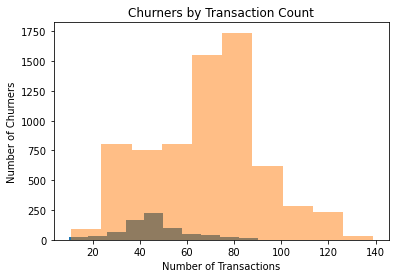

In [40]:
#histogram of attrited customers by total transaction count
plt.hist(churners_nonzero.Total_Trans_Ct)
plt.hist(content_customers_nonzero.Total_Trans_Ct, alpha=0.5)
plt.title("Churners by Transaction Count")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Churners")
plt.savefig("Output/Transaction_Count_Histogram.png")
plt.show()

In [41]:
#Looking at  Transaction Amount and Transaction Count by Months (instead of totally)
bank_churners_nonzero["Amt_by_Month"] = ""
bank_churners_nonzero["Ct_by_Month"] = ""

In [42]:
bank_churners_nonzero["Amt_by_Month"] = bank_churners_nonzero["Total_Trans_Amt"]/bank_churners_nonzero["Months_on_book"]
bank_churners_nonzero["Ct_by_Month"]= bank_churners_nonzero["Total_Trans_Ct"]/bank_churners_nonzero["Months_on_book"]
bank_churners_nonzero

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Amt_by_Month,Ct_by_Month
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,29.333333,1.076923
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,29.340909,0.750000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,34.441176,0.588235
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,30.222222,0.666667
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,28.913043,0.673913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,458.147059,3.352941
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,291.920000,2.400000
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,386.900000,2.925000
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,350.560000,2.760000


In [43]:
churners_nonzero = bank_churners_nonzero.loc[bank_churners_nonzero["Attrition_Flag"]=="Attrited Customer"]
content_customers_nonzero = bank_churners_nonzero.loc[bank_churners_nonzero["Attrition_Flag"]=="Existing Customer"]


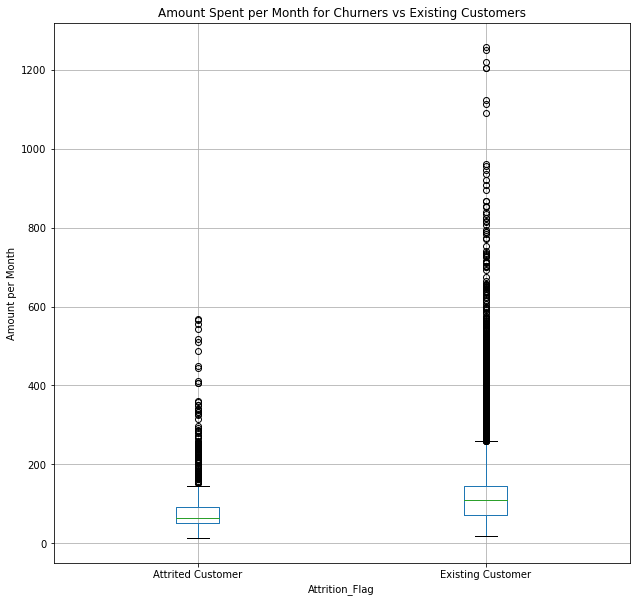

In [44]:
#Box plot of amount by month
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Amt_by_Month", figsize=(10,10))
plt.title("Amount Spent per Month for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Amount per Month")
plt.savefig("Output/Amount_per_month.png")
plt.show()


In [45]:
churners_apm = churners_nonzero["Amt_by_Month"]
content_apm = content_customers_nonzero["Amt_by_Month"]
st.ttest_ind(churners_apm, content_apm, equal_var=False)

Ttest_indResult(statistic=-13.199800312858137, pvalue=5.252490394314885e-37)

In [46]:
customer_types = bank_churners["Attrition_Flag"].unique()

apm_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Mean Amount by Month":[content_apm.mean(), churners_apm.mean()],
                              "Median Amount by Month": [content_apm.median(), churners_apm.median()],
                              "Standard Deviation for Amount by Month": [content_apm.std(), churners_apm.std()]
                              })

apm_df["Mean Amount by Month"] = apm_df ["Mean Amount by Month"].map("{:.2f}".format)
apm_df["Median Amount by Month"] = apm_df ["Median Amount by Month"].map("{:.2f}".format)
apm_df["Standard Deviation for Amount by Month"] = apm_df["Standard Deviation for Amount by Month"].map("{:.2f}".format)

apm_df

,Customer Type,Mean Amount by Month,Median Amount by Month,Standard Deviation for Amount by Month
0,Existing Customer,138.91,110.58,121.73
1,Attrited Customer,93.49,63.66,84.38


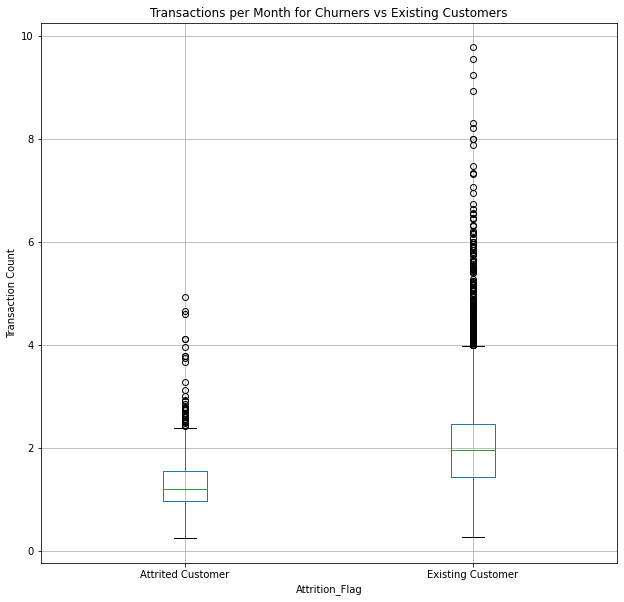

In [47]:
#Boxplot of Transaction Count by Month
bank_churners_nonzero.boxplot(by="Attrition_Flag", column = "Ct_by_Month", figsize=(10,10))
plt.title("Transactions per Month for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Transaction Count")
plt.savefig("Output/transaction_count_by_month.png")
plt.show()


In [48]:
churners_cpm = churners_nonzero["Ct_by_Month"]
content_cpm = content_customers_nonzero["Ct_by_Month"]
st.ttest_ind(churners_apm, content_apm, equal_var=False)

Ttest_indResult(statistic=-13.199800312858137, pvalue=5.252490394314885e-37)

In [49]:
customer_types = bank_churners["Attrition_Flag"].unique()

cpm_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Mean Transaction Count by Month":[content_cpm.mean(), churners_cpm.mean()],
                              "Median Transaction Count by Month": [content_cpm.median(), churners_cpm.median()],
                              "Standard Deviation for Transaction Count by Month": [content_cpm.std(), churners_cpm.std()]
                              })

cpm_df["Mean Transaction Count by Month"] = cpm_df ["Mean Transaction Count by Month"].map("{:.2f}".format)
cpm_df["Median Transaction Count by Month"] = cpm_df["Median Transaction Count by Month"].map("{:.2f}".format)
cpm_df["Standard Deviation for Transaction Count by Month"]= cpm_df["Standard Deviation for Transaction Count by Month"].map("{:.2f}".format)

cpm_df

,Customer Type,Mean Transaction Count by Month,Median Transaction Count by Month,Standard Deviation for Transaction Count by Month
0,Existing Customer,2.02,1.95,0.92
1,Attrited Customer,1.32,1.19,0.61


## Conclusions
After looking at the data, graphs, and statistical calaculations the three categories that had statistically significant effects on whether or not customers churned was:

-Total Transaction Amount

-Total Transaction Count

-Month's Inactive (out of 12 months)

In [50]:
#Determining Cutoffs for the Profile
#Total Transaction Count
np.quantile(churner_ttc, [0.75])

array([51.])

In [56]:
np.quantile(churners_ma, [0.75])

array([3.])

In [58]:
#Data Frame to show the number of existing customers who are at risk for churning
#at_risk = content_customers.loc[content_customers["Total_Trans_Amt"]<2796]
at_risk = content_customers_nonzero.loc[content_customers_nonzero["Total_Trans_Ct"]<=51]
at_risk = at_risk.loc[at_risk["Months_Inactive_12_mon"]>=3]
at_risk

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Amt_by_Month,Ct_by_Month
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,34.441176,0.588235
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,40.027778,0.888889
10,708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,38.741935,1.354839
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,...,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095,30.235294,0.617647
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,31.277778,0.638889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,718837683,Existing Customer,55,M,2,High School,Single,$120K +,Blue,49,...,3029.0,1505,1524.0,0.560,2394,50,0.471,0.497,48.857143,1.020408
5374,718921683,Existing Customer,49,M,4,Unknown,Married,$80K - $120K,Blue,38,...,9738.0,1835,7903.0,0.763,4816,49,0.885,0.188,126.736842,1.289474
6357,721306908,Existing Customer,61,F,1,Graduate,Single,Unknown,Blue,44,...,2303.0,540,1763.0,0.570,3440,46,0.704,0.234,78.181818,1.045455
7629,709618308,Existing Customer,46,F,3,High School,Single,$40K - $60K,Silver,40,...,16239.0,1487,14752.0,0.531,3838,48,0.600,0.092,95.950000,1.200000


In [59]:
#Number of At risk Churners Among the Current Existing Customers
at_risk["CLIENTNUM"].count()/content_customers_nonzero["CLIENTNUM"].count()

0.10313447927199192

In [56]:
#alternate at risk table
at_risk_alt = content_customers.loc[(content_customers["Total_Trans_Ct"]<=51)|
                                   (content_customers["Months_Inactive_12_mon"]>=3)]
at_risk_alt


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,720608658,Existing Customer,33,F,1,Uneducated,Single,Less than $40K,Blue,36,...,3,3,8398.0,1875,6523.0,0.727,16706,123,0.757,0.223
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than $40K,Blue,35,...,3,5,4165.0,0,4165.0,0.813,17093,111,0.820,0.000
10111,710734308,Existing Customer,49,M,1,Graduate,Single,$60K - $80K,Blue,40,...,3,3,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,...,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276


In [57]:
#Number of At risk Churners Among the Current Existing Customers
at_risk_alt["CLIENTNUM"].count()/content_customers_nonzero["CLIENTNUM"].count()

0.6871298569984111

NameError: name 'churners_nonzero' is not defined